##**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Raw Data**

In [2]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1s9IhOrxRm3EJkbUD8mIn9qATdW33Unzj84HrLx4kYsY/edit#gid=1154160255'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


#**Sorting Data by ID**

In [3]:
df.sort_values('ID', axis=0, ascending=True, inplace=True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1503,0,1985,Graduation,Married,"$70,951.00",0,0,5/4/13,66,239,...,9,1,0,0,0,0,0,0,0,SA
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
1956,9,1975,Master,Single,"$46,098.00",1,1,8/18/12,86,57,...,2,8,0,0,0,0,0,0,0,CA
1311,13,1947,PhD,Widow,"$25,358.00",0,1,7/22/13,57,19,...,3,6,0,0,0,0,0,0,0,SA
1834,17,1971,PhD,Married,"$60,491.00",0,1,9/6/13,81,637,...,7,5,0,0,0,0,0,0,0,SP


#**Check, Clean and Visualize Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 1503 to 261
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumW

In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Null values of Income = 24

Datatype of Income = object

In [6]:
df['Income'].sample(5)

1009    $62,847.00
1297    $31,385.00
1848    $83,033.00
92      $24,163.00
1521    $39,858.00
Name: Income, dtype: object

Remove unnecessary symbols

Change Income Datatype to float

In [7]:
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype(float)
df['Income'].sample(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


1164    30168.0
1053    59481.0
1567    48178.0
1752    89120.0
1902    38946.0
Name: Income, dtype: float64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [9]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [10]:
median = df['Income'].median()
print(f"Median of Income is {median}")

Median of Income is 51381.5


Mean and Median are not too different, but Maximum value is 666666, assuming it's an outlier.

To know the skewness, we need to confirm with histogram.

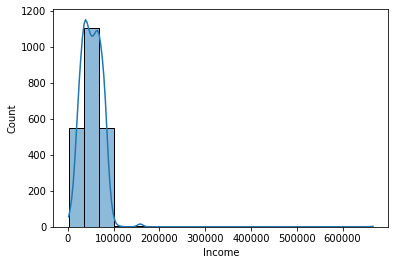

In [11]:
ax = sns.histplot(df['Income'], kde=True, bins=20)

On the histogram above, we can conclude that the income data is positively skewed.

Because of this skewness, we can fill null values in the income column with Median, which lies between 0 - 100000, normal distribution part of the curve.

In [13]:
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Income'].isna().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 1503 to 261
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null  

In [16]:
#convert Dt_Customer to Datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 1503 to 261
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-n

In [15]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1503,0,1985,Graduation,Married,70951.0,0,0,2013-05-04,66,239,...,9,1,0,0,0,0,0,0,0,SA
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
1956,9,1975,Master,Single,46098.0,1,1,2012-08-18,86,57,...,2,8,0,0,0,0,0,0,0,CA
1311,13,1947,PhD,Widow,25358.0,0,1,2013-07-22,57,19,...,3,6,0,0,0,0,0,0,0,SA
1834,17,1971,PhD,Married,60491.0,0,1,2013-09-06,81,637,...,7,5,0,0,0,0,0,0,0,SP


In [17]:
from datetime import datetime
from datetime import date

current_year = date.today().year

df['Age'] = [(current_year - x) for x in df['Year_Birth']]
print("Statistical summary of feature Age:")
df['Age'].describe()

Statistical summary of feature Age:


count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

In [18]:
#convert Year_Birth to Datetime
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')
print(f"Datetype of Year_Birth is {df['Year_Birth'].dtypes}")

Datetype of Year_Birth is datetime64[ns]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 1503 to 261
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-n

##Total Amount Spent by Each Customer

In [21]:
df['Total Amount'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts']
+ df['MntFishProducts'] + df['MntSweetProducts']
+ df['MntGoldProds']

print("Total amount spent by each customer:")
tempdf = {'Customer ID' :df['ID'], 'Total Amount' :df['Total Amount']}
pd.concat(tempdf, axis=1)

Total amount spent by each customer:


,Customer ID,Total Amount
1503,0,803
1,1,533
1956,9,84
1311,13,24
1834,17,921
...,...,...
1554,11178,27
1925,11181,5
529,11187,20
1897,11188,44


##Percentage of The Amount Spent on Various Products

In [22]:
k = 100/df['Total Amount']
WinesProd = df['MntWines']*k
FruitsProd = df['MntFruits']*k
MeatProd = df['MntMeatProducts']*k
FishProd = df['MntFishProducts']*k
SweetProd = df['MntSweetProducts']*k
GoldProd = df['MntGoldProds']*k

ID = df['ID']

print("Percentage of the amount spent on various products:")
tempdf = {'Customer ID' :df['ID'], 'Wines' :WinesProd, 'Fruits' :FruitsProd,
          'Meat' :MeatProd, 'Fish' :FishProd, 'Sweet' :SweetProd, 'Gold' :GoldProd}
pd.concat(tempdf, axis=1)

Percentage of the amount spent on various products:


,Customer ID,Wines,Fruits,Meat,Fish,Sweet,Gold
1503,0,29.763387,1.245330,68.991283,31.631382,10.834371,6.724782
1,1,87.054409,0.938086,12.007505,1.313321,0.000000,6.941839
1956,9,67.857143,0.000000,32.142857,0.000000,0.000000,42.857143
1311,13,79.166667,0.000000,20.833333,0.000000,0.000000,33.333333
1834,17,69.163952,5.103149,25.732899,1.302932,2.062975,8.251900
...,...,...,...,...,...,...,...
1554,11178,55.555556,7.407407,37.037037,0.000000,3.703704,14.814815
1925,11181,40.000000,20.000000,40.000000,20.000000,20.000000,20.000000
529,11187,10.000000,40.000000,50.000000,60.000000,70.000000,115.000000
1897,11188,34.090909,22.727273,43.181818,18.181818,38.636364,45.454545


##Total Numbers of Purchases Done by Each Customer

In [23]:
df['Total Purchase'] = df['NumWebPurchases'] + df['NumStorePurchases']
+ df['NumCatalogPurchases'] + df['NumDealsPurchases']

print("Total numbers of purchases done by each customer:")
tempdf = {'Customer ID' :df['ID'], 'Net Purchase' :df['Total Purchase']}
pd.DataFrame(tempdf)

Total numbers of purchases done by each customer:


,Customer ID,Net Purchase
1503,0,12
1,1,14
1956,9,5
1311,13,4
1834,17,13
...,...,...
1554,11178,4
1925,11181,0
529,11187,5
1897,11188,5


##Percentage of Purchase Category

In [24]:
k = 100/df['Total Purchase']
WebPurch = df['NumWebPurchases']*k
StorePurch = df['NumStorePurchases']*k
CatalogPurch = df['NumCatalogPurchases']*k
DealsPurch = df['NumDealsPurchases']*k

print("Percentage of purchase category:")
tempdf = {'Customer ID' :df['ID'], 'Web' :WebPurch, 'Store' :StorePurch,
          'Catalog' :CatalogPurch, 'Deals' :DealsPurch}
pd.DataFrame(tempdf)

Percentage of purchase category:


,Customer ID,Web,Store,Catalog,Deals
1503,0,25.000000,75.000000,33.333333,8.333333
1,1,50.000000,50.000000,21.428571,7.142857
1956,9,60.000000,40.000000,40.000000,80.000000
1311,13,25.000000,75.000000,0.000000,50.000000
1834,17,46.153846,53.846154,84.615385,30.769231
...,...,...,...,...,...
1554,11178,25.000000,75.000000,0.000000,25.000000
1925,11181,NaN,NaN,NaN,NaN
529,11187,40.000000,60.000000,20.000000,60.000000
1897,11188,40.000000,60.000000,20.000000,60.000000


##Succes Rate for Each Marketing Campaign

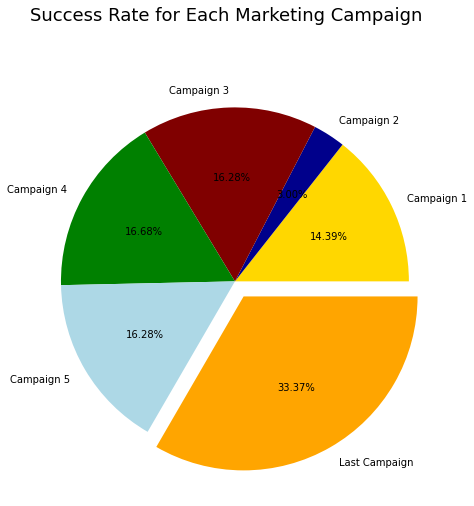

In [25]:
Campaign1 = df['AcceptedCmp1'].sum()
Campaign2 = df['AcceptedCmp2'].sum()
Campaign3 = df['AcceptedCmp3'].sum()
Campaign4 = df['AcceptedCmp4'].sum()
Campaign5 = df['AcceptedCmp5'].sum()
LastCampaign = df['Response'].sum()

#Visualize Data on Pie Chart
#Set Figure
fig1 = plt.figure(figsize=(10, 8))
fig1.suptitle("Success Rate for Each Marketing Campaign", fontsize=18)
#Data to Plot
data = [Campaign1, Campaign2, Campaign3, Campaign4, Campaign5, LastCampaign]
labels = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5',
          'Last Campaign']
colors = ['gold', 'darkblue', 'maroon', 'green', 'lightblue', 'orange']
explode = (0, 0, 0, 0, 0, 0.1)

#Plot
ax = plt.pie(data, explode=explode, labels=labels, colors=colors,
             autopct='%.2f%%')

##Revenue Generated by Each Product

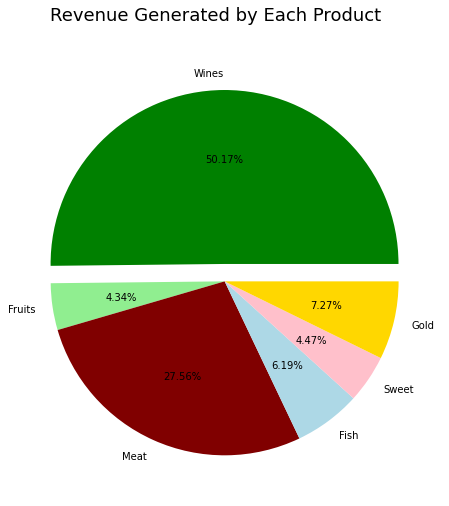

In [26]:
WinesRev = df['MntWines'].sum()
FruitsRev = df['MntFruits'].sum()
MeatRev = df['MntMeatProducts'].sum()
FishRev = df['MntFishProducts'].sum()
SweetRev = df['MntSweetProducts'].sum()
GoldRev = df['MntGoldProds'].sum()

#Visualize Data on Pie Chart
#Set Figure
fig2 = plt.figure(figsize=(10, 8))
fig2.suptitle("Revenue Generated by Each Product", fontsize=18)

#Data to Plot
data = [WinesRev, FruitsRev, MeatRev, FishRev, SweetRev, GoldRev]
labels = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
colors = ['green', 'lightgreen', 'maroon', 'lightblue', 'pink', 'gold']
explode = (0.1, 0, 0, 0, 0, 0)

#Plot
ax = plt.pie(data, labels=labels, colors=colors, explode=explode,
             autopct='%.2f%%')

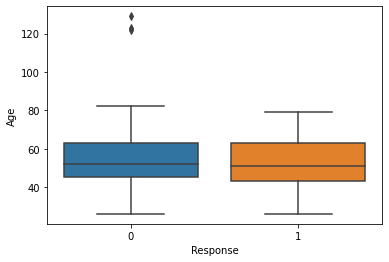

In [27]:
ax = sns.boxplot(data=df, y=df['Age'], x=df['Response'])

##Number of Accepted Campaign by Country

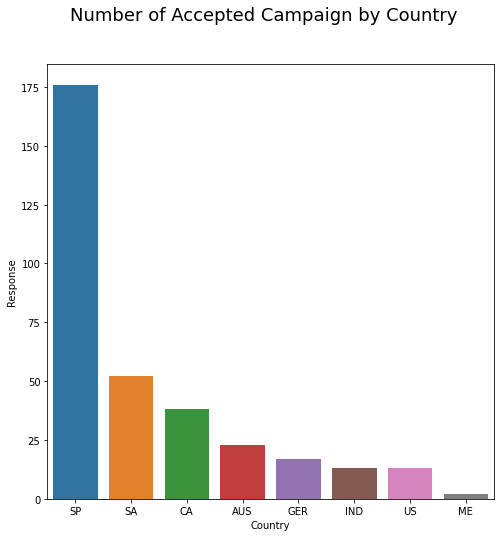

In [28]:
data = df.loc[df['Response']==1, ['Country', 'Response']]
data

bycountry = data.groupby('Country').sum().reset_index()

plt.figure(figsize=(8, 8))
plt.suptitle("Number of Accepted Campaign by Country", fontsize=18)
ax = sns.barplot(data=bycountry, x='Country', y='Response',
                 order=bycountry.sort_values('Response',ascending=False).Country)

##Number of Dependents

[Text(0.5, 0, 'Number of Dependents')]

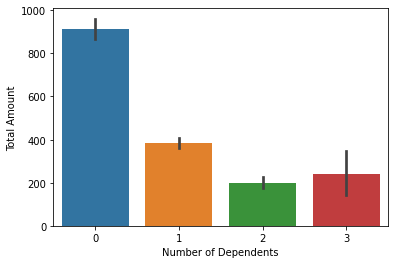

In [29]:
dependents = df['Kidhome'] + df['Teenhome']
ax = sns.barplot(x=dependents, y=df['Total Amount'])
ax.set(xlabel='Number of Dependents')

[Text(0.5, 0, 'Number of Dependents')]

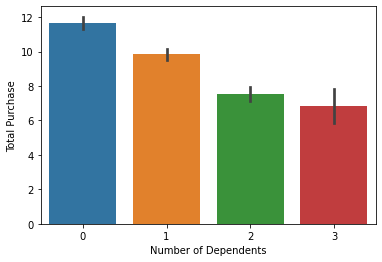

In [30]:
ax = sns.barplot(x=dependents, y=df['Total Purchase'])
ax.set(xlabel='Number of Dependents')

##Total Number of Purchases by Each Channel

In [31]:
Web = df['NumWebPurchases'].sum()
Store = df['NumStorePurchases'].sum()
Catalog = df['NumCatalogPurchases'].sum()
Deals = df['NumDealsPurchases'].sum()

print("Total Number of Purchases by Channel:")

tempdf = {'Channels' :['Web', 'Store', 'Catalog', 'Deals'],
          'Total Purchase' :[Web, Store, Catalog, Deals]}
channel = pd.DataFrame(tempdf)
channel

Total Number of Purchases by Channel:


,Channels,Total Purchase
0,Web,9150
1,Store,12970
2,Catalog,5963
3,Deals,5208


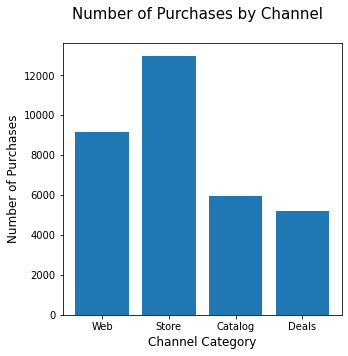

In [32]:
fig4 = plt.figure(figsize=(5, 5))

fig4.suptitle('Number of Purchases by Channel', fontsize=15)
plt.xlabel('Channel Category', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)

x = channel['Channels']
y = channel['Total Purchase']
plt.bar(x, y)
plt.show()

#**Preparation for Cluster Analysis**

##Preparation

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [34]:
def silhouette_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:

        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):

            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        centers = clusterer.cluster_centers_

        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

In [35]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Total Amount,Total Purchase
1503,0,1985-01-01,Graduation,Married,70951.0,0,0,2013-05-04,66,239,...,0,0,0,0,0,0,SA,37,803,12
1,1,1961-01-01,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,61,533,14
1956,9,1975-01-01,Master,Single,46098.0,1,1,2012-08-18,86,57,...,0,0,0,0,0,0,CA,47,84,5
1311,13,1947-01-01,PhD,Widow,25358.0,0,1,2013-07-22,57,19,...,0,0,0,0,0,0,SA,75,24,4
1834,17,1971-01-01,PhD,Married,60491.0,0,1,2013-09-06,81,637,...,0,0,0,0,0,0,SP,51,921,13


In [36]:
#Making an Age Group Column
df.loc[df['Age'].between(6,24), 'Age Group'] = 'Gen Z'
df.loc[df['Age'].between(25,40), 'Age Group'] = 'Millennials'
df.loc[df['Age'].between(41,56), 'Age Group'] = 'Gen X'
df.loc[df['Age'].between(57,75), 'Age Group'] = 'Baby Boomers'
df.loc[df['Age']>=76, 'Age Group'] = 'Pre Boomers'
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Total Amount,Total Purchase,Age Group
1503,0,1985-01-01,Graduation,Married,70951.0,0,0,2013-05-04,66,239,...,0,0,0,0,0,SA,37,803,12,Millennials
1,1,1961-01-01,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,61,533,14,Baby Boomers
1956,9,1975-01-01,Master,Single,46098.0,1,1,2012-08-18,86,57,...,0,0,0,0,0,CA,47,84,5,Gen X
1311,13,1947-01-01,PhD,Widow,25358.0,0,1,2013-07-22,57,19,...,0,0,0,0,0,SA,75,24,4,Baby Boomers
1834,17,1971-01-01,PhD,Married,60491.0,0,1,2013-09-06,81,637,...,0,0,0,0,0,SP,51,921,13,Gen X


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 1503 to 261
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-n

In [38]:
#Copy Dataframe
df2 = df.copy()

In [39]:
for i in df2.columns:
  unique_data = df2[i].value_counts()
  print(unique_data,'\n')

0        1
7375     1
7348     1
7349     1
7352     1
        ..
3698     1
3697     1
3696     1
3690     1
11191    1
Name: ID, Length: 2240, dtype: int64 

1976-01-01    89
1971-01-01    87
1975-01-01    83
1972-01-01    79
1978-01-01    77
1970-01-01    77
1973-01-01    74
1965-01-01    74
1969-01-01    71
1974-01-01    69
1956-01-01    55
1979-01-01    53
1958-01-01    53
1952-01-01    52
1977-01-01    52
1959-01-01    51
1968-01-01    51
1954-01-01    50
1966-01-01    50
1955-01-01    49
1960-01-01    49
1982-01-01    45
1963-01-01    45
1962-01-01    44
1967-01-01    44
1951-01-01    43
1957-01-01    43
1986-01-01    42
1964-01-01    42
1983-01-01    42
1980-01-01    39
1981-01-01    39
1984-01-01    38
1961-01-01    36
1953-01-01    35
1985-01-01    32
1989-01-01    30
1949-01-01    30
1988-01-01    29
1950-01-01    29
1987-01-01    27
1948-01-01    21
1990-01-01    18
1946-01-01    16
1947-01-01    16
1991-01-01    15
1992-01-01    13
1945-01-01     8
1943-01-01     7
1944-01

In [40]:
df2.drop(df2.index[df2['Marital_Status'] == 'Alone'], inplace=True)
df2.drop(df2.index[df2['Marital_Status'] == 'YOLO'], inplace=True)
df2.drop(df2.index[df2['Marital_Status'] == 'Absurd'], inplace=True)
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Total Amount,Total Purchase,Age Group
1503,0,1985-01-01,Graduation,Married,70951.0,0,0,2013-05-04,66,239,...,0,0,0,0,0,SA,37,803,12,Millennials
1,1,1961-01-01,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,61,533,14,Baby Boomers
1956,9,1975-01-01,Master,Single,46098.0,1,1,2012-08-18,86,57,...,0,0,0,0,0,CA,47,84,5,Gen X
1311,13,1947-01-01,PhD,Widow,25358.0,0,1,2013-07-22,57,19,...,0,0,0,0,0,SA,75,24,4,Baby Boomers
1834,17,1971-01-01,PhD,Married,60491.0,0,1,2013-09-06,81,637,...,0,0,0,0,0,SP,51,921,13,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,11178,1972-01-01,Master,Single,42394.0,1,0,2014-03-23,69,15,...,0,0,0,0,0,GER,50,27,4,Gen X
1925,11181,1949-01-01,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,CA,73,5,0,Baby Boomers
529,11187,1978-01-01,Basic,Single,26487.0,1,0,2013-05-20,23,2,...,0,0,0,0,0,CA,44,20,5,Gen X
1897,11188,1957-01-01,Graduation,Together,26091.0,1,1,2014-02-25,84,15,...,0,0,0,0,0,SP,65,44,5,Baby Boomers


In [41]:
print(df2['Marital_Status'].value_counts())

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64


In [42]:
df2['Dependents'] = df2['Kidhome'] + df2['Teenhome']
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Total Amount,Total Purchase,Age Group,Dependents
1503,0,1985-01-01,Graduation,Married,70951.0,0,0,2013-05-04,66,239,...,0,0,0,0,SA,37,803,12,Millennials,0
1,1,1961-01-01,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,1,1,0,CA,61,533,14,Baby Boomers,0
1956,9,1975-01-01,Master,Single,46098.0,1,1,2012-08-18,86,57,...,0,0,0,0,CA,47,84,5,Gen X,2
1311,13,1947-01-01,PhD,Widow,25358.0,0,1,2013-07-22,57,19,...,0,0,0,0,SA,75,24,4,Baby Boomers,1
1834,17,1971-01-01,PhD,Married,60491.0,0,1,2013-09-06,81,637,...,0,0,0,0,SP,51,921,13,Gen X,1


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 1503 to 261
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2233 non-null   int64         
 1   Year_Birth           2233 non-null   datetime64[ns]
 2   Education            2233 non-null   object        
 3   Marital_Status       2233 non-null   object        
 4   Income               2233 non-null   float64       
 5   Kidhome              2233 non-null   int64         
 6   Teenhome             2233 non-null   int64         
 7   Dt_Customer          2233 non-null   datetime64[ns]
 8   Recency              2233 non-null   int64         
 9   MntWines             2233 non-null   int64         
 10  MntFruits            2233 non-null   int64         
 11  MntMeatProducts      2233 non-null   int64         
 12  MntFishProducts      2233 non-null   int64         
 13  MntSweetProducts     2233 non-n

In [44]:
#Drop Unused Columns
df2.drop(['Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Complain'], axis=1, inplace=True)
df2

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Country,Age,Total Amount,Total Purchase,Age Group,Dependents
1503,0,Graduation,Married,70951.0,66,239,10,554,254,87,...,0,0,0,0,SA,37,803,12,Millennials,0
1,1,Graduation,Single,57091.0,0,464,5,64,7,0,...,0,0,1,1,CA,61,533,14,Baby Boomers,0
1956,9,Master,Single,46098.0,86,57,0,27,0,0,...,0,0,0,0,CA,47,84,5,Gen X,2
1311,13,PhD,Widow,25358.0,57,19,0,5,0,0,...,0,0,0,0,SA,75,24,4,Baby Boomers,1
1834,17,PhD,Married,60491.0,81,637,47,237,12,19,...,0,0,0,0,SP,51,921,13,Gen X,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,11178,Master,Single,42394.0,69,15,2,10,0,1,...,0,0,0,0,GER,50,27,4,Gen X,1
1925,11181,PhD,Married,156924.0,85,2,1,2,1,1,...,0,0,0,0,CA,73,5,0,Baby Boomers,0
529,11187,Basic,Single,26487.0,23,2,8,10,12,14,...,0,0,0,0,CA,44,20,5,Gen X,1
1897,11188,Graduation,Together,26091.0,84,15,10,19,8,17,...,0,0,0,0,SP,65,44,5,Baby Boomers,2


In [45]:
#Filter Rows Which Have Total Purchase 0 but Have Total Amount or Vice Versa
filter_amount = df2['Total Amount']==0
filter_purchase = df2['Total Purchase']==0
print(df2[filter_amount|filter_purchase])

         ID   Education Marital_Status    Income  Recency  MntWines  \
456    3955  Graduation       Divorced    4861.0       20         2   
325    4931  Graduation       Together  157146.0       13         1   
961    5376  Graduation        Married    2447.0       42         1   
1826   5555  Graduation       Divorced  153924.0       81         1   
1466   6862  Graduation       Divorced    1730.0       65         1   
2204   8475         PhD        Married  157243.0       98        20   
663    9931         PhD        Married    4023.0       29         5   
379   10241    2n Cycle       Divorced   11448.0       16         0   
1416  10749  Graduation         Single    8028.0       62        73   
1291  11110  Graduation         Single    3502.0       56         2   
1925  11181         PhD        Married  156924.0       85         2   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
456           1                1                1                 0  ..

In [46]:
df2 = df2[~(filter_amount|filter_purchase)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2222 entries, 1503 to 261
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2222 non-null   int64  
 1   Education            2222 non-null   object 
 2   Marital_Status       2222 non-null   object 
 3   Income               2222 non-null   float64
 4   Recency              2222 non-null   int64  
 5   MntWines             2222 non-null   int64  
 6   MntFruits            2222 non-null   int64  
 7   MntMeatProducts      2222 non-null   int64  
 8   MntFishProducts      2222 non-null   int64  
 9   MntSweetProducts     2222 non-null   int64  
 10  MntGoldProds         2222 non-null   int64  
 11  NumDealsPurchases    2222 non-null   int64  
 12  NumWebPurchases      2222 non-null   int64  
 13  NumCatalogPurchases  2222 non-null   int64  
 14  NumStorePurchases    2222 non-null   int64  
 15  NumWebVisitsMonth    2222 non-null  

##Check Outlier for Numerical Column

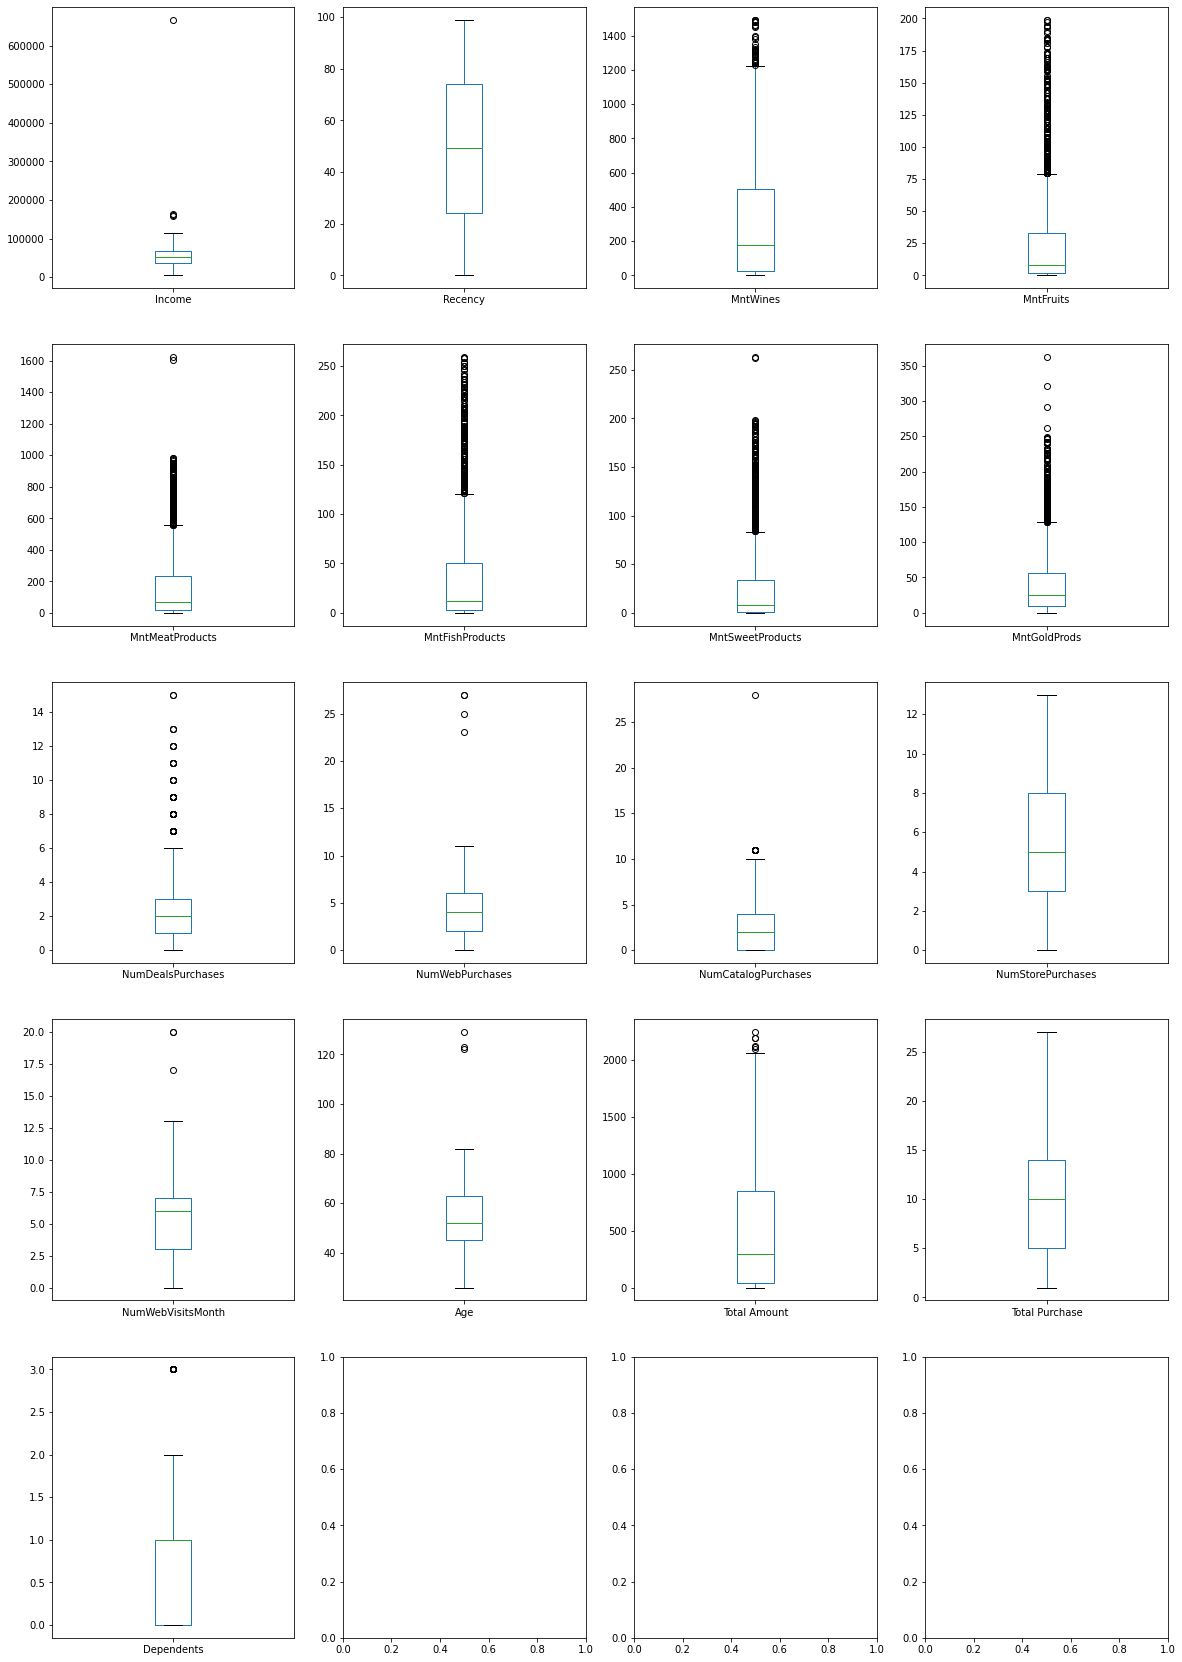

In [47]:
df2.columns
numerical_column = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                    'NumWebVisitsMonth', 'Age', 'Total Amount', 'Total Purchase', 'Dependents']

fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,30))
for i,el in enumerate(numerical_column):
    a = df2.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [48]:
df2 = df2[(df2['Income']<600000)]
print(df2.shape)
df2

(2221, 28)


,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Country,Age,Total Amount,Total Purchase,Age Group,Dependents
1503,0,Graduation,Married,70951.0,66,239,10,554,254,87,...,0,0,0,0,SA,37,803,12,Millennials,0
1,1,Graduation,Single,57091.0,0,464,5,64,7,0,...,0,0,1,1,CA,61,533,14,Baby Boomers,0
1956,9,Master,Single,46098.0,86,57,0,27,0,0,...,0,0,0,0,CA,47,84,5,Gen X,2
1311,13,PhD,Widow,25358.0,57,19,0,5,0,0,...,0,0,0,0,SA,75,24,4,Baby Boomers,1
1834,17,PhD,Married,60491.0,81,637,47,237,12,19,...,0,0,0,0,SP,51,921,13,Gen X,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,11176,PhD,Together,65968.0,12,376,9,83,19,4,...,0,0,0,0,CA,52,468,12,Gen X,1
1554,11178,Master,Single,42394.0,69,15,2,10,0,1,...,0,0,0,0,GER,50,27,4,Gen X,1
529,11187,Basic,Single,26487.0,23,2,8,10,12,14,...,0,0,0,0,CA,44,20,5,Gen X,1
1897,11188,Graduation,Together,26091.0,84,15,10,19,8,17,...,0,0,0,0,SP,65,44,5,Baby Boomers,2


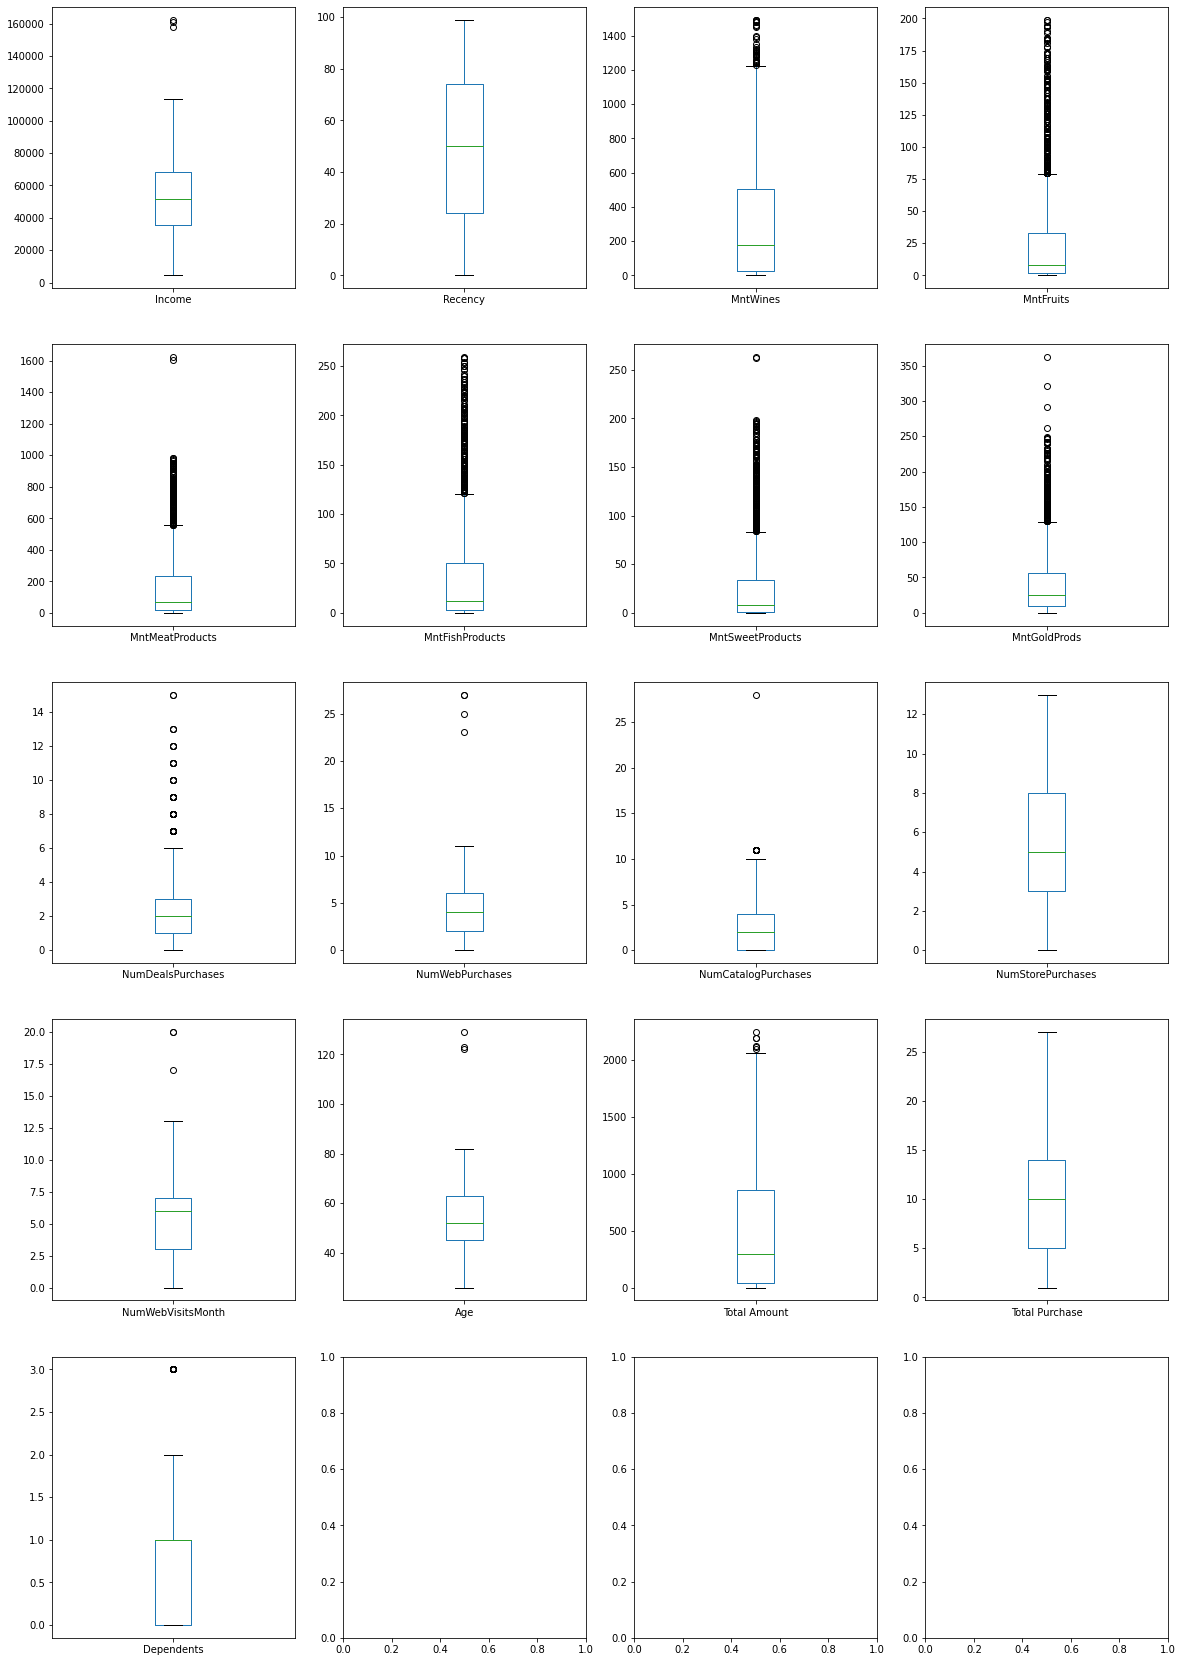

In [49]:
df2.columns
numerical_column = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                    'NumWebVisitsMonth', 'Age', 'Total Amount', 'Total Purchase', 'Dependents']

fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,30))
for i,el in enumerate(numerical_column):
    a = df2.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2221 entries, 1503 to 261
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2221 non-null   int64  
 1   Education            2221 non-null   object 
 2   Marital_Status       2221 non-null   object 
 3   Income               2221 non-null   float64
 4   Recency              2221 non-null   int64  
 5   MntWines             2221 non-null   int64  
 6   MntFruits            2221 non-null   int64  
 7   MntMeatProducts      2221 non-null   int64  
 8   MntFishProducts      2221 non-null   int64  
 9   MntSweetProducts     2221 non-null   int64  
 10  MntGoldProds         2221 non-null   int64  
 11  NumDealsPurchases    2221 non-null   int64  
 12  NumWebPurchases      2221 non-null   int64  
 13  NumCatalogPurchases  2221 non-null   int64  
 14  NumStorePurchases    2221 non-null   int64  
 15  NumWebVisitsMonth    2221 non-null  

# **RFM Analysis**

##Data Preparation

In [51]:
df_rfm = df2.copy()
df_rfm.head()

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Country,Age,Total Amount,Total Purchase,Age Group,Dependents
1503,0,Graduation,Married,70951.0,66,239,10,554,254,87,...,0,0,0,0,SA,37,803,12,Millennials,0
1,1,Graduation,Single,57091.0,0,464,5,64,7,0,...,0,0,1,1,CA,61,533,14,Baby Boomers,0
1956,9,Master,Single,46098.0,86,57,0,27,0,0,...,0,0,0,0,CA,47,84,5,Gen X,2
1311,13,PhD,Widow,25358.0,57,19,0,5,0,0,...,0,0,0,0,SA,75,24,4,Baby Boomers,1
1834,17,PhD,Married,60491.0,81,637,47,237,12,19,...,0,0,0,0,SP,51,921,13,Gen X,1


In [52]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2221 entries, 1503 to 261
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2221 non-null   int64  
 1   Education            2221 non-null   object 
 2   Marital_Status       2221 non-null   object 
 3   Income               2221 non-null   float64
 4   Recency              2221 non-null   int64  
 5   MntWines             2221 non-null   int64  
 6   MntFruits            2221 non-null   int64  
 7   MntMeatProducts      2221 non-null   int64  
 8   MntFishProducts      2221 non-null   int64  
 9   MntSweetProducts     2221 non-null   int64  
 10  MntGoldProds         2221 non-null   int64  
 11  NumDealsPurchases    2221 non-null   int64  
 12  NumWebPurchases      2221 non-null   int64  
 13  NumCatalogPurchases  2221 non-null   int64  
 14  NumStorePurchases    2221 non-null   int64  
 15  NumWebVisitsMonth    2221 non-null  

##Drop Columns

In [53]:
df_rfm = df_rfm.drop(df_rfm.loc[:, 'MntWines':'Response'], axis=1)
df_rfm.head()

,ID,Education,Marital_Status,Income,Recency,Country,Age,Total Amount,Total Purchase,Age Group,Dependents
1503,0,Graduation,Married,70951.0,66,SA,37,803,12,Millennials,0
1,1,Graduation,Single,57091.0,0,CA,61,533,14,Baby Boomers,0
1956,9,Master,Single,46098.0,86,CA,47,84,5,Gen X,2
1311,13,PhD,Widow,25358.0,57,SA,75,24,4,Baby Boomers,1
1834,17,PhD,Married,60491.0,81,SP,51,921,13,Gen X,1


In [54]:
df_rfm = df_rfm.drop(df_rfm.loc[:, 'Education':'Income'], axis=1)
df_rfm.head()

,ID,Recency,Country,Age,Total Amount,Total Purchase,Age Group,Dependents
1503,0,66,SA,37,803,12,Millennials,0
1,1,0,CA,61,533,14,Baby Boomers,0
1956,9,86,CA,47,84,5,Gen X,2
1311,13,57,SA,75,24,4,Baby Boomers,1
1834,17,81,SP,51,921,13,Gen X,1


In [55]:
df_rfm = df_rfm.drop(['Dependents'], axis=1)
df_rfm

,ID,Recency,Country,Age,Total Amount,Total Purchase,Age Group
1503,0,66,SA,37,803,12,Millennials
1,1,0,CA,61,533,14,Baby Boomers
1956,9,86,CA,47,84,5,Gen X
1311,13,57,SA,75,24,4,Baby Boomers
1834,17,81,SP,51,921,13,Gen X
...,...,...,...,...,...,...,...
288,11176,12,CA,52,468,12,Gen X
1554,11178,69,GER,50,27,4,Gen X
529,11187,23,CA,44,20,5,Gen X
1897,11188,84,SP,65,44,5,Baby Boomers


##Rename Columns

In [56]:
df_rfm = df_rfm.rename({'Total Amount': 'Monetary',
                        'Total Purchase': 'Frequency'}, axis=1)
df_rfm.head()

,ID,Recency,Country,Age,Monetary,Frequency,Age Group
1503,0,66,SA,37,803,12,Millennials
1,1,0,CA,61,533,14,Baby Boomers
1956,9,86,CA,47,84,5,Gen X
1311,13,57,SA,75,24,4,Baby Boomers
1834,17,81,SP,51,921,13,Gen X


##Rearrange Columns

In [57]:
column_title = list(df_rfm.columns)
column_title

['ID', 'Recency', 'Country', 'Age', 'Monetary', 'Frequency', 'Age Group']

In [58]:
column_title[2], column_title[3], column_title[4], column_title[5], column_title[6] = column_title[5], column_title[4], column_title[3], column_title[6], column_title[2]

In [59]:
column_title

['ID', 'Recency', 'Frequency', 'Monetary', 'Age', 'Age Group', 'Country']

In [60]:
df_rfm = df_rfm[column_title]
df_rfm

,ID,Recency,Frequency,Monetary,Age,Age Group,Country
1503,0,66,12,803,37,Millennials,SA
1,1,0,14,533,61,Baby Boomers,CA
1956,9,86,5,84,47,Gen X,CA
1311,13,57,4,24,75,Baby Boomers,SA
1834,17,81,13,921,51,Gen X,SP
...,...,...,...,...,...,...,...
288,11176,12,12,468,52,Gen X,CA
1554,11178,69,4,27,50,Gen X,GER
529,11187,23,5,20,44,Gen X,CA
1897,11188,84,5,44,65,Baby Boomers,SP


##Descriptive Stats for Recency, Frequency & Monetary

In [61]:
df_rfm.Recency.describe()

count    2221.000000
mean       49.172445
std        28.966157
min         0.000000
25%        24.000000
50%        50.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


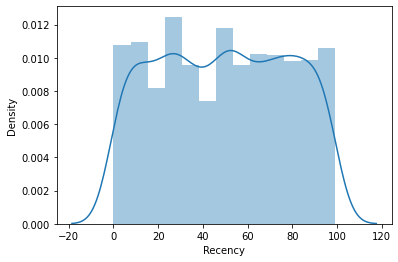

In [62]:
a = df_rfm['Recency']
ax = sns.distplot(a)

In [63]:
df_rfm.Frequency.describe()

count    2221.000000
mean        9.922557
std         5.203805
min         1.000000
25%         5.000000
50%        10.000000
75%        14.000000
max        27.000000
Name: Frequency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


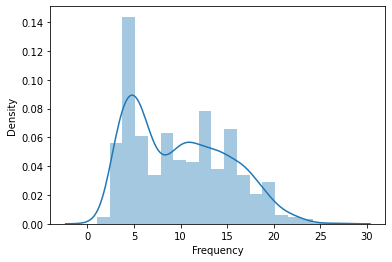

In [64]:
b = df_rfm['Frequency']
ax = sns.distplot(b)

In [65]:
df_rfm.Monetary.describe()

count    2221.000000
mean      497.757317
std       520.317176
min         1.000000
25%        43.000000
50%       296.000000
75%       854.000000
max      2246.000000
Name: Monetary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


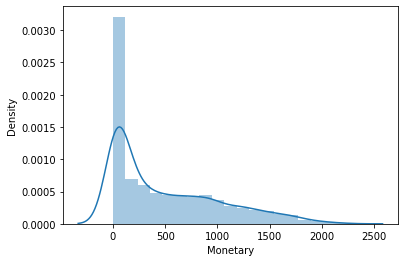

In [66]:
c = df_rfm['Monetary']
ax = sns.distplot(c)

##Create Quantiles

In [67]:
quantiles = df_rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'Age': {0.25: 45.0, 0.5: 52.0, 0.75: 63.0},
 'Frequency': {0.25: 5.0, 0.5: 10.0, 0.75: 14.0},
 'ID': {0.25: 2815.0, 0.5: 5453.0, 0.75: 8416.0},
 'Monetary': {0.25: 43.0, 0.5: 296.0, 0.75: 854.0},
 'Recency': {0.25: 24.0, 0.5: 50.0, 0.75: 74.0}}

##Functions to Create R, F and M Segments

In [68]:
def Rscoring(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMscoring(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [69]:
df_rfm['R'] = df_rfm['Recency'].apply(Rscoring, args=('Recency', quantiles,))
df_rfm['F'] = df_rfm['Frequency'].apply(FnMscoring, args=('Frequency', quantiles,))
df_rfm['M'] = df_rfm['Monetary'].apply(FnMscoring, args=('Monetary', quantiles,))
df_rfm.head()

,ID,Recency,Frequency,Monetary,Age,Age Group,Country,R,F,M
1503,0,66,12,803,37,Millennials,SA,3,2,2
1,1,0,14,533,61,Baby Boomers,CA,1,2,2
1956,9,86,5,84,47,Gen X,CA,4,4,3
1311,13,57,4,24,75,Baby Boomers,SA,3,4,4
1834,17,81,13,921,51,Gen X,SP,4,2,1


In [ ]:
df_rfm['RFMGroup'] = df_rfm.R.map(str) + df_rfm.F.map(str) + df_rfm.M.map(str)

df_rfm['RFMScore'] = df_rfm[['R', 'F', 'M']].sum(axis=1)
df_rfm.head()

In [71]:
loyalty_level = ['Platinum', 'Gold', 'Silver', 'Bronze']
score_cuts = pd.qcut(df_rfm.RFMScore, q=4, labels=loyalty_level)
df_rfm['RFM_loyalty_level'] = score_cuts.values
df_rfm.head()

,ID,Recency,Frequency,Monetary,Age,Age Group,Country,R,F,M,RFMGroup,RFMScore,RFM_loyalty_level
1503,0,66,12,803,37,Millennials,SA,3,2,2,322,7,Gold
1,1,0,14,533,61,Baby Boomers,CA,1,2,2,122,5,Platinum
1956,9,86,5,84,47,Gen X,CA,4,4,3,443,11,Bronze
1311,13,57,4,24,75,Baby Boomers,SA,3,4,4,344,11,Bronze
1834,17,81,13,921,51,Gen X,SP,4,2,1,421,7,Gold


Validating Loyalty Level

In [72]:
df_rfm[df_rfm['RFMGroup']== '111'].sort_values('Monetary', 
                                               ascending=False).reset_index().head(10)

,index,ID,Recency,Frequency,Monetary,Age,Age Group,Country,R,F,M,RFMGroup,RFMScore,RFM_loyalty_level
0,376,10133,16,18,2101,52,Gen X,CA,1,1,1,111,3,Platinum
1,77,7919,2,18,2043,46,Gen X,SP,1,1,1,111,3,Platinum
2,470,3690,20,17,1959,36,Millennials,SP,1,1,1,111,3,Platinum
3,436,3711,19,16,1839,78,Pre Boomers,SP,1,1,1,111,3,Platinum
4,465,3667,20,19,1645,53,Gen X,GER,1,1,1,111,3,Platinum
5,472,9260,20,19,1614,77,Pre Boomers,CA,1,1,1,111,3,Platinum
6,444,9242,19,15,1596,32,Millennials,SA,1,1,1,111,3,Platinum
7,353,5031,14,16,1543,48,Gen X,SP,1,1,1,111,3,Platinum
8,410,380,17,20,1538,68,Baby Boomers,SA,1,1,1,111,3,Platinum
9,425,9560,18,15,1487,57,Baby Boomers,SP,1,1,1,111,3,Platinum


##Recommendations Based on RFM Results

Marketing Program Recommendation:
* Encourage customers who have Platinum loyalty level to sign up loyalty programs to enjoy some privilege experiences like same day shipping, higher discount or high priority to access new products.
* Company could try to offer some reward or coupons to trigger the spending for these almost churned out customers.

#**RFM Visualizations**

##Preparation

In [73]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.4 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=a27b3f9628eca0609989912c93dc10f436d924db82b1eb7da1eeb87eb790911b
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [74]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

##Recency vs Frequency (2D)

In [75]:
plot_data = [
             gobj.Scatter(
                 x=df_rfm.query("RFM_loyalty_level == 'Bronze'")['Recency'],
                 y=df_rfm.query("RFM_loyalty_level == 'Bronze'")['Frequency'],
                 mode='markers',
                 name='Bronze',
                 marker=dict(size=7,
                             line=dict(width=1),
                             color='blue',
                             opacity=0.8
                             )
             ),
             gobj.Scatter(
                 x=df_rfm.query("RFM_loyalty_level == 'Silver'")['Recency'],
                 y=df_rfm.query("RFM_loyalty_level == 'Silver'")['Frequency'],
                 mode='markers',
                 name='Silver',
                 marker=dict(size=9,
                             line=dict(width=1),
                             color='green',
                             opacity=0.5
                             )
             ),
             gobj.Scatter(
                 x=df_rfm.query("RFM_loyalty_level == 'Gold'")['Recency'],
                 y=df_rfm.query("RFM_loyalty_level == 'Gold'")['Frequency'],
                 mode='markers',
                 name='Gold',
                 marker=dict(size=11,
                             line=dict(width=1),
                             color='red',
                             opacity=0.9
                             )
             ),
             gobj.Scatter(
                 x=df_rfm.query("RFM_loyalty_level == 'Platinum'")['Recency'],
                 y=df_rfm.query("RFM_loyalty_level == 'Platinum'")['Frequency'],
                 mode='markers',
                 name='Platinum',
                 marker=dict(size=13,
                             line=dict(width=1),
                             color='black',
                             opacity=0.5
                             )
             ),
]
plot_layout = gobj.Layout(
    yaxis = {'title': "Frequency"},
    xaxis = {'title': "Recency"},
    title = 'Recency vs Frequency'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

##Frequency vs Monetary (2D)

In [ ]:
plot_data = [
             gobj.Scatter(
                 x=df_rfm.query("RFM_loyalty_level == 'Bronze'")['Frequency'],
                 y=df_rfm.query("RFM_loyalty_level == 'Bronze'")['Monetary'],
                 mode='markers',
                 name='Bronze',
                 marker=dict(size=7,
                             line=dict(width=1),
                             color='blue',
                             opacity=0.8
                             )
             ),
             gobj.Scatter(
                 x=df_rfm.query("RFM_loyalty_level == 'Silver'")['Frequency'],
                 y=df_rfm.query("RFM_loyalty_level == 'Silver'")['Monetary'],
                 mode='markers',
                 name='Silver',
                 marker=dict(size=9,
                             line=dict(width=1),
                             color='green',
                             opacity=0.5
                             )
             ),
             gobj.Scatter(
                 x=df_rfm.query("RFM_loyalty_level == 'Gold'")['Frequency'],
                 y=df_rfm.query("RFM_loyalty_level == 'Gold'")['Monetary'],
                 mode='markers',
                 name='Gold',
                 marker=dict(size=11,
                             line=dict(width=1),
                             color='red',
                             opacity=0.9
                             )
             ),
             gobj.Scatter(
                 x=df_rfm.query("RFM_loyalty_level == 'Platinum'")['Frequency'],
                 y=df_rfm.query("RFM_loyalty_level == 'Platinum'")['Monetary'],
                 mode='markers',
                 name='Platinum',
                 marker=dict(size=13,
                             line=dict(width=1),
                             color='black',
                             opacity=0.5
                             )
             ),
]
plot_layout = gobj.Layout(
    yaxis = {'title': "Monetary"},
    xaxis = {'title': "Frequency"},
    title = 'Frequency vs Monetary'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

##Recency vs Monetary (2D)

In [ ]:
plot_data = [
             gobj.Scatter(
                 x=df_rfm.query("RFM_loyalty_level == 'Bronze'")['Recency'],
                 y=df_rfm.query("RFM_loyalty_level == 'Bronze'")['Monetary'],
                 mode='markers',
                 name='Bronze',
                 marker=dict(size=7,
                             line=dict(width=1),
                             color='blue',
                             opacity=0.8
                             )
             ),
             gobj.Scatter(
                 x=df_rfm.query("RFM_loyalty_level == 'Silver'")['Recency'],
                 y=df_rfm.query("RFM_loyalty_level == 'Silver'")['Monetary'],
                 mode='markers',
                 name='Silver',
                 marker=dict(size=9,
                             line=dict(width=1),
                             color='green',
                             opacity=0.5
                             )
             ),
             gobj.Scatter(
                 x=df_rfm.query("RFM_loyalty_level == 'Gold'")['Recency'],
                 y=df_rfm.query("RFM_loyalty_level == 'Gold'")['Monetary'],
                 mode='markers',
                 name='Gold',
                 marker=dict(size=11,
                             line=dict(width=1),
                             color='red',
                             opacity=0.9
                             )
             ),
             gobj.Scatter(
                 x=df_rfm.query("RFM_loyalty_level == 'Platinum'")['Recency'],
                 y=df_rfm.query("RFM_loyalty_level == 'Platinum'")['Monetary'],
                 mode='markers',
                 name='Platinum',
                 marker=dict(size=13,
                             line=dict(width=1),
                             color='black',
                             opacity=0.5
                             )
             ),
]
plot_layout = gobj.Layout(
    yaxis = {'title': "Monetary"},
    xaxis = {'title': "Recency"},
    title = 'Recency vs Monetary'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

##3D Visualization for RFM

In [ ]:
plot_data = [
             gobj.Scatter3d(
                 x=df_rfm.query("RFM_loyalty_level == 'Bronze'")['Recency'],
                 y=df_rfm.query("RFM_loyalty_level == 'Bronze'")['Frequency'],
                 z=df_rfm.query("RFM_loyalty_level == 'Bronze'")['Monetary'],
                 mode='markers',
                 name='Bronze',
                 marker=dict(size=7,
                             line=dict(width=1),
                             color='blue',
                             opacity=0.8
                             )
             ),
             gobj.Scatter3d(
                 x=df_rfm.query("RFM_loyalty_level == 'Silver'")['Recency'],
                 y=df_rfm.query("RFM_loyalty_level == 'Silver'")['Frequency'],
                 z=df_rfm.query("RFM_loyalty_level == 'Silver'")['Monetary'],
                 mode='markers',
                 name='Silver',
                 marker=dict(size=9,
                             line=dict(width=1),
                             color='green',
                             opacity=0.5
                             )
             ),
             gobj.Scatter3d(
                 x=df_rfm.query("RFM_loyalty_level == 'Gold'")['Recency'],
                 y=df_rfm.query("RFM_loyalty_level == 'Gold'")['Frequency'],
                 z=df_rfm.query("RFM_loyalty_level == 'Gold'")['Monetary'],
                 mode='markers',
                 name='Gold',
                 marker=dict(size=11,
                             line=dict(width=1),
                             color='red',
                             opacity=0.9
                             )
             ),
             gobj.Scatter3d(
                 x=df_rfm.query("RFM_loyalty_level == 'Platinum'")['Recency'],
                 y=df_rfm.query("RFM_loyalty_level == 'Platinum'")['Frequency'],
                 z=df_rfm.query("RFM_loyalty_level == 'Platinum'")['Monetary'],
                 mode='markers',
                 name='Platinum',
                 marker=dict(size=13,
                             line=dict(width=1),
                             color='black',
                             opacity=0.5
                             )
             ),
]
plot_layout = gobj.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#**K-Means Clustering Using RFM Data**

##Check Outliers

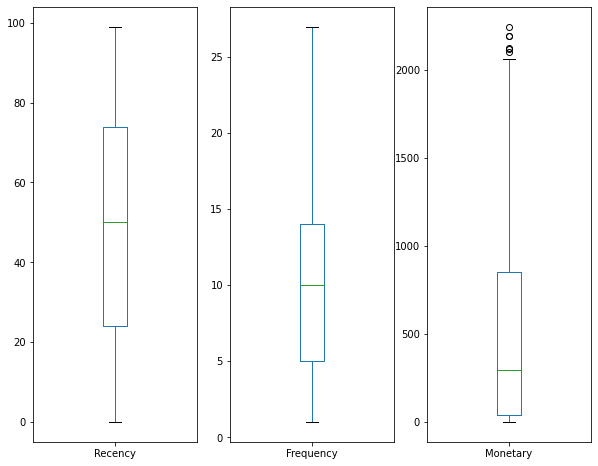

In [ ]:
df_rfm.columns
rfm_numerical = ['Recency', 'Frequency', 'Monetary']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10,8))
for i,el in enumerate(rfm_numerical):
    a = df_rfm.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

##Prepare Data to Cluster

In [ ]:
rfm_cluster = df_rfm.copy()

In [ ]:
scaler = MinMaxScaler()
rfm_cluster[rfm_numerical] = scaler.fit_transform(rfm_cluster[rfm_numerical])
rfm_cluster

,ID,Recency,Frequency,Monetary,Age,Age Group,Country,R,F,M,RFMGroup,RFMScore,RFM_loyalty_level
1503,0,0.666667,0.423077,0.357238,37,Millennials,SA,3,2,2,322,7,Gold
1,1,0.000000,0.500000,0.236971,61,Baby Boomers,CA,1,2,2,122,5,Platinum
1956,9,0.868687,0.153846,0.036971,47,Gen X,CA,4,4,3,443,11,Bronze
1311,13,0.575758,0.115385,0.010245,75,Baby Boomers,SA,3,4,4,344,11,Bronze
1834,17,0.818182,0.461538,0.409800,51,Gen X,SP,4,2,1,421,7,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,11176,0.121212,0.423077,0.208018,52,Gen X,CA,1,2,2,122,5,Platinum
1554,11178,0.696970,0.115385,0.011581,50,Gen X,GER,3,4,4,344,11,Bronze
529,11187,0.232323,0.153846,0.008463,44,Gen X,CA,1,4,4,144,9,Silver
1897,11188,0.848485,0.153846,0.019154,65,Baby Boomers,SP,4,4,3,443,11,Bronze


##Clustering

In [ ]:
rfm_cluster = rfm_cluster.drop(['ID', 'Age', 'Age Group', 'Country', 'R', 'F',
                                'M', 'RFMGroup', 'RFMScore', 'RFM_loyalty_level'], axis=1)

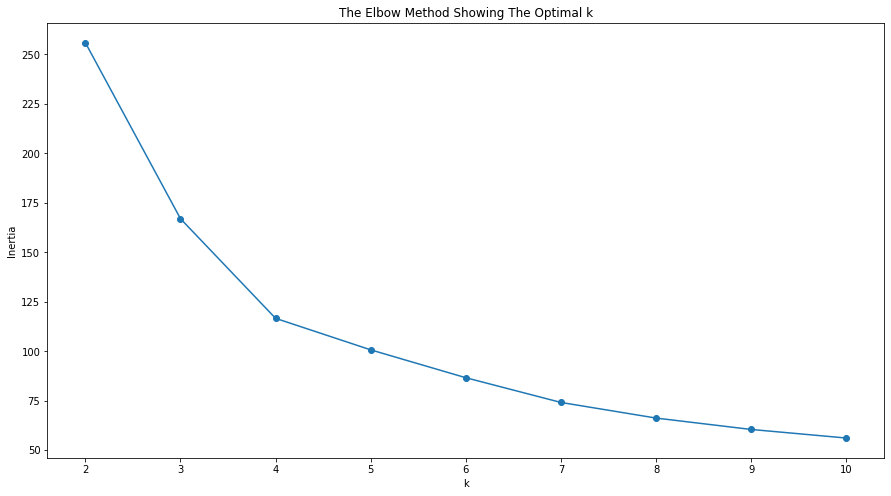

In [ ]:
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, init='k-means++', random_state=3)
    kmeanModel.fit(rfm_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(15,8))
plt.plot(K, distortions, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method Showing The Optimal k')
plt.show()

In [ ]:
rfm_model = cluster.KMeans(n_clusters=4, init='k-means++', random_state=3)
rfm_model.fit(rfm_cluster)
rfm_label = rfm_model.labels_
df_rfm['Clusters'] = rfm_label
df_rfm

,ID,Recency,Frequency,Monetary,Age,Age Group,Country,R,F,M,RFMGroup,RFMScore,RFM_loyalty_level,Clusters
1503,0,66,12,803,37,Millennials,SA,3,2,2,322,7,Gold,1
1,1,0,14,533,61,Baby Boomers,CA,1,2,2,122,5,Platinum,2
1956,9,86,5,84,47,Gen X,CA,4,4,3,443,11,Bronze,3
1311,13,57,4,24,75,Baby Boomers,SA,3,4,4,344,11,Bronze,3
1834,17,81,13,921,51,Gen X,SP,4,2,1,421,7,Gold,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,11176,12,12,468,52,Gen X,CA,1,2,2,122,5,Platinum,2
1554,11178,69,4,27,50,Gen X,GER,3,4,4,344,11,Bronze,3
529,11187,23,5,20,44,Gen X,CA,1,4,4,144,9,Silver,0
1897,11188,84,5,44,65,Baby Boomers,SP,4,4,3,443,11,Bronze,3


##Clustering Visualization

In [ ]:
plot_data = [
             gobj.Scatter3d(
                 x=df_rfm.query("Clusters == 0")['Recency'],
                 y=df_rfm.query("Clusters == 0")['Frequency'],
                 z=df_rfm.query("Clusters == 0")['Monetary'],
                 mode='markers',
                 name='Cluster 1',
                 marker=dict(size=7,
                             line=dict(width=1),
                             color='blue',
                             opacity=0.8
                             )
             ),
             gobj.Scatter3d(
                 x=df_rfm.query("Clusters == 1")['Recency'],
                 y=df_rfm.query("Clusters == 1")['Frequency'],
                 z=df_rfm.query("Clusters == 1")['Monetary'],
                 mode='markers',
                 name='Cluster 2',
                 marker=dict(size=9,
                             line=dict(width=1),
                             color='green',
                             opacity=0.5
                             )
             ),
             gobj.Scatter3d(
                 x=df_rfm.query("Clusters == 2")['Recency'],
                 y=df_rfm.query("Clusters == 2")['Frequency'],
                 z=df_rfm.query("Clusters == 2")['Monetary'],
                 mode='markers',
                 name='Cluster 3',
                 marker=dict(size=11,
                             line=dict(width=1),
                             color='red',
                             opacity=0.9
                             )
             ),
             gobj.Scatter3d(
                 x=df_rfm.query("Clusters == 3")['Recency'],
                 y=df_rfm.query("Clusters == 3")['Frequency'],
                 z=df_rfm.query("Clusters == 3")['Monetary'],
                 mode='markers',
                 name='Cluster 4',
                 marker=dict(size=13,
                             line=dict(width=1),
                             color='black',
                             opacity=0.5
                             )
             ),
]
plot_layout = gobj.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

##Cluster Grouping

In [ ]:
print('Cluster Group by Recency')
df_rfm.groupby(['Clusters', 'RFM_loyalty_level'])['Recency',
                                                  'Frequency', 'Monetary'].agg(['count','mean'])

Cluster Group by Recency


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Recency            Frequency            Monetary  \
                             count       mean     count       mean    count   
Clusters RFM_loyalty_level                                                    
0        Platinum               43  21.837209        43  11.186047       43   
         Gold                  127  17.519685       127   8.173228      127   
         Silver                322  23.422360       322   5.295031      322   
         Bronze                131  38.137405       131   3.870229      131   
1        Platinum              257  67.591440       257  16.233463      257   
         Gold                  184  75.353261       184  13.494565      184   
         Silver                 72  82.611111        72  10.708333       72   
         Bronze                  0        NaN         0        NaN        0   
2        Platinum              475  22.191579       475  14.749474      475   
         Gold                    3  38.333333         3   9.666667        3   
         Silver                  0        NaN         0        NaN        0   
         Bronze                  0        NaN         0        NaN        0   
3        Platinum                1  50.000000         1  12.000000        1   
         Gold                   28  62.892857        28  11.642857       28   
         Silver                155  69.890323       155   8.877419      155   
         Bronze                423  78.075650       423   5.040189      423   

                                         
                                   mean  
Clusters RFM_loyalty_level               
0        Platinum            340.651163  
         Gold                195.944882  
         Silver               66.248447  
         Bronze               22.572519  
1        Platinum           1112.645914  
         Gold                901.244565  
         Silver              892.402778  
         Bronze                     NaN  
2        Platinum            945.821053  
         Gold                741.000000  
         Silver                     NaN  
         Bronze                     NaN  
3        Platinum            383.000000  
         Gold                361.178571  
         Silver              241.083871  
         Bronze               62.205674

#**Insights Summary**

In [ ]:
df2

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Country,Age,Total Amount,Total Purchase,Age Group,Dependents
1503,0,Graduation,Married,70951.0,66,239,10,554,254,87,...,0,0,0,0,SA,37,803,12,Millennials,0
1,1,Graduation,Single,57091.0,0,464,5,64,7,0,...,0,0,1,1,CA,61,533,14,Baby Boomers,0
1956,9,Master,Single,46098.0,86,57,0,27,0,0,...,0,0,0,0,CA,47,84,5,Gen X,2
1311,13,PhD,Widow,25358.0,57,19,0,5,0,0,...,0,0,0,0,SA,75,24,4,Baby Boomers,1
1834,17,PhD,Married,60491.0,81,637,47,237,12,19,...,0,0,0,0,SP,51,921,13,Gen X,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,11176,PhD,Together,65968.0,12,376,9,83,19,4,...,0,0,0,0,CA,52,468,12,Gen X,1
1554,11178,Master,Single,42394.0,69,15,2,10,0,1,...,0,0,0,0,GER,50,27,4,Gen X,1
529,11187,Basic,Single,26487.0,23,2,8,10,12,14,...,0,0,0,0,CA,44,20,5,Gen X,1
1897,11188,Graduation,Together,26091.0,84,15,10,19,8,17,...,0,0,0,0,SP,65,44,5,Baby Boomers,2


##Total Amount Spent by Age Group

In [ ]:
total_spent_by_age_group = df2.groupby(['Age Group'])['Total Amount'].sum()
total_spent_by_age_group = pd.DataFrame(total_spent_by_age_group).reset_index()
total_spent_by_age_group

,Age Group,Total Amount
0,Baby Boomers,464798
1,Gen X,442463
2,Millennials,164584
3,Pre Boomers,33674


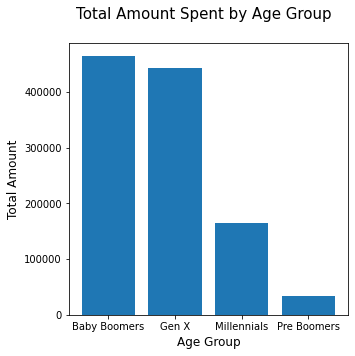

In [ ]:
fig5 = plt.figure(figsize=(5, 5))

fig5.suptitle('Total Amount Spent by Age Group', fontsize=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)

x = total_spent_by_age_group['Age Group']
y = total_spent_by_age_group['Total Amount']
plt.bar(x, y)
plt.show()

##Purchases Channel by Age Grup

In [ ]:
channel_by_age_group = df2.groupby(['Age Group'])['NumDealsPurchases', 'NumWebPurchases',
                                          'NumCatalogPurchases', 'NumStorePurchases'].sum()
channel_by_age_group = channel_by_age_group.reset_index()
channel_by_age_group

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Age Group,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,Baby Boomers,1959,3620,2565,5137
1,Gen X,2521,4077,2286,5670
2,Millennials,560,1163,844,1811
3,Pre Boomers,63,250,169,310


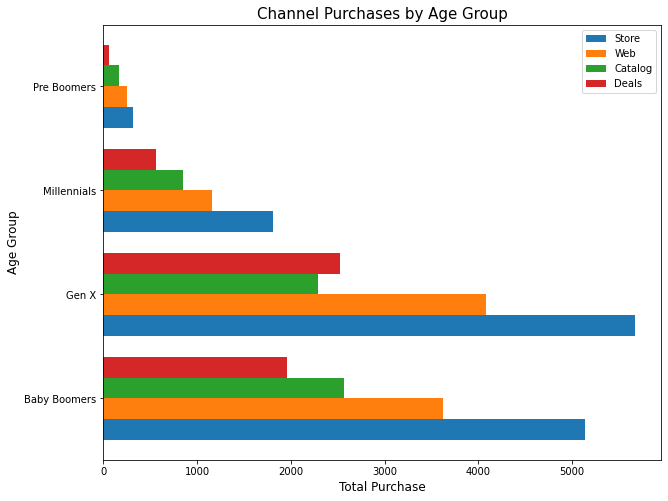

In [ ]:
plt.figure(figsize=(10, 8))

age_group = channel_by_age_group['Age Group']
xposition = np.arange(len(age_group))

channel1 = channel_by_age_group['NumStorePurchases']
channel2 = channel_by_age_group['NumWebPurchases']
channel3 = channel_by_age_group['NumCatalogPurchases']
channel4 = channel_by_age_group['NumDealsPurchases']

plt.barh(xposition-0.3, channel1, height=0.2, label='Store')
plt.barh(xposition-0.1, channel2, height=0.2, label='Web')
plt.barh(xposition+0.1, channel3, height=0.2, label='Catalog')
plt.barh(xposition+0.3, channel4, height=0.2, label='Deals')

plt.yticks(xposition, age_group)
plt.title('Channel Purchases by Age Group', fontsize=15)
plt.ylabel('Age Group', fontsize=12)
plt.xlabel('Total Purchase', fontsize=12)
plt.legend()

plt.show()

##Amount Spent on Various Product by Age Group

In [ ]:
product_by_age_group = df2.groupby(['Age Group'])['MntWines', 'MntFruits', 'MntMeatProducts',
                                                  'MntFishProducts', 'MntSweetProducts',
                                                  'MntGoldProds'].sum()
product_by_age_group = product_by_age_group.reset_index()
product_by_age_group

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Age Group,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Baby Boomers,297278,22480,145040,32417,23198,40080
1,Gen X,272623,24378,145462,34623,25313,40814
2,Millennials,87799,9980,66805,13427,10189,15055
3,Pre Boomers,21090,1852,10732,3118,1810,2058


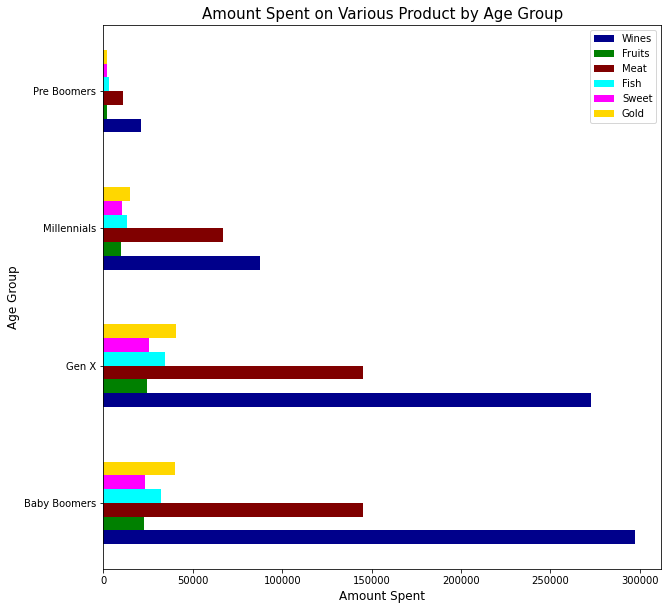

In [ ]:
plt.figure(figsize=(10, 10))

product = product_by_age_group['Age Group']
position = np.arange(len(product))

Wines = product_by_age_group['MntWines']
Fruits = product_by_age_group['MntFruits']
Meat = product_by_age_group['MntMeatProducts']
Fish = product_by_age_group['MntFishProducts']
Sweet = product_by_age_group['MntSweetProducts']
Gold = product_by_age_group['MntGoldProds']

plt.barh(position-0.25, Wines, height=0.1, color='darkblue', label='Wines')
plt.barh(position-0.15, Fruits, height=0.1, color='green', label='Fruits')
plt.barh(position-0.05, Meat, height=0.1, color='maroon', label='Meat')
plt.barh(position+0.05, Fish, height=0.1, color='cyan', label='Fish')
plt.barh(position+0.15, Sweet, height=0.1, color='magenta', label='Sweet')
plt.barh(position+0.25, Gold, height=0.1, color='gold', label='Gold')

plt.yticks(position, product)
plt.title('Amount Spent on Various Product by Age Group', fontsize=15)
plt.ylabel('Age Group', fontsize=12)
plt.xlabel('Amount Spent', fontsize=12)
plt.legend()

plt.show()

##Success Rate for Each Marketing Campaign

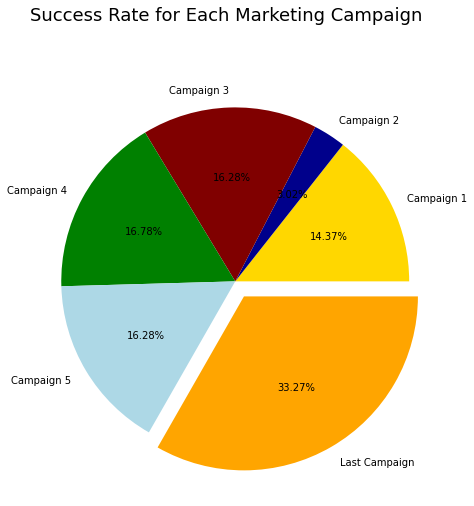

In [ ]:
Cmp1 = df2['AcceptedCmp1'].sum()
Cmp2 = df2['AcceptedCmp2'].sum()
Cmp3 = df2['AcceptedCmp3'].sum()
Cmp4 = df2['AcceptedCmp4'].sum()
Cmp5 = df2['AcceptedCmp5'].sum()
LastCmp = df2['Response'].sum()

#Visualize Data on Pie Chart
#Set Figure
fig6 = plt.figure(figsize=(10, 8))
fig6.suptitle("Success Rate for Each Marketing Campaign", fontsize=18)
#Data to Plot
data = [Cmp1, Cmp2, Cmp3, Cmp4, Cmp5, LastCmp]
labels = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5',
          'Last Campaign']
colors = ['gold', 'darkblue', 'maroon', 'green', 'lightblue', 'orange']
explode = (0, 0, 0, 0, 0, 0.1)

#Plot
ax = plt.pie(data, explode=explode, labels=labels, colors=colors,
             autopct='%.2f%%')

##Revenue Generated by Each Product

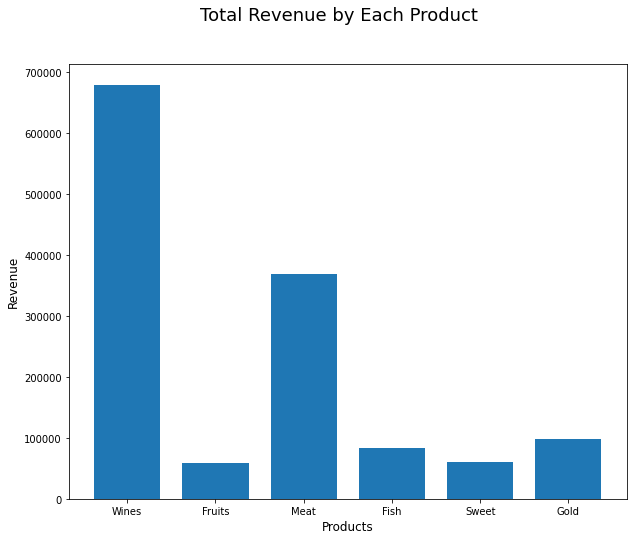

In [ ]:
Wines_Rev = df2['MntWines'].sum()
Fruits_Rev = df2['MntFruits'].sum()
Meat_Rev = df2['MntMeatProducts'].sum()
Fish_Rev = df2['MntFishProducts'].sum()
Sweet_Rev = df2['MntSweetProducts'].sum()
Gold_Rev = df2['MntGoldProds'].sum()

#Visualize Data on Pie Chart
#Set Figure
fig7 = plt.figure(figsize=(10, 8))
fig7.suptitle("Total Revenue by Each Product", fontsize=18)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

#Data to Plot
data = [Wines_Rev, Fruits_Rev, Meat_Rev, Fish_Rev, Sweet_Rev, Gold_Rev]
labels = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']

#Plot
ax = plt.bar(labels, data, width=0.75)
plt.show()

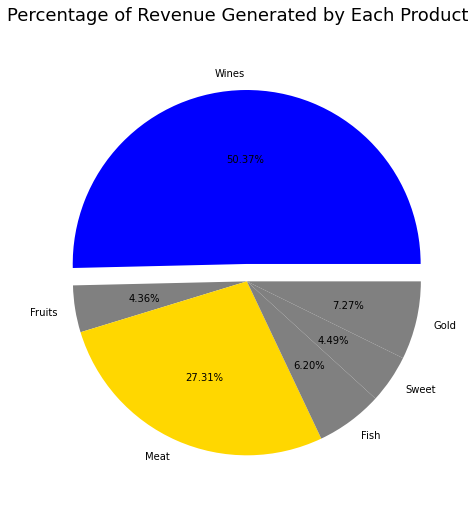

In [ ]:
#Visualize Data on Pie Chart
#Set Figure
fig8 = plt.figure(figsize=(10, 8))
fig8.suptitle("Percentage of Revenue Generated by Each Product", fontsize=18)

#Data to Plot
data = [Wines_Rev, Fruits_Rev, Meat_Rev, Fish_Rev, Sweet_Rev, Gold_Rev]
labels = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
colors = ['blue', 'grey', 'gold', 'grey', 'grey', 'grey']
explode = (0.1, 0, 0, 0, 0, 0)

#Plot
ax = plt.pie(data, labels=labels, colors=colors, explode=explode,
             autopct='%.2f%%')

## Number of Store Purchase & Web Purchase

In [ ]:
plt.figure(figsize=(10, 8))

age_group = channel_by_age_group['Age Group']
xposition = np.arange(len(age_group))

channel_store = channel_by_age_group['NumStorePurchases']
channel_web = channel_by_age_group['NumWebPurchases']

plt.barh(xposition-0.2, channel_store, height=0.4, label='Store Purchase', color='darkblue')
plt.barh(xposition+0.2, channel_web, height=0.4, label='Web Purchase', color='gold')

plt.yticks(xposition, age_group)
plt.title('Store and Web Purchases by Age Group', fontsize=15)
plt.ylabel('Age Group', fontsize=12)
plt.xlabel('Total Purchase', fontsize=12)
plt.legend()

plt.show()

##Number of Accepted Last Campaign by Country

In [ ]:
cmp_by_country = df2.loc[df2['Response']==1, ['Country', 'Response']]
cmp_by_country

country = cmp_by_country.groupby('Country').sum().reset_index()

plt.figure(figsize=(10, 8))
plt.suptitle("Number of Accepted Last Campaign by Country", fontsize=18)
ax = sns.barplot(data=country, x='Country', y='Response',
                 order=country.sort_values('Response',ascending=False).Country)

##Correlation Between Numerical Columns

In [ ]:
df_correl = df2[numerical_column]
df_correl.head()

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_correl.corr(), vmin=-1, vmax=1, annot=True, cmap='YlOrBr')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)

#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Positively Correlated:


*   Wines vs Total Amount
*   Meat vs Total Amount
*   Fruits vs Total Amount



#**Export to CSV File**

**DON'T RUN THIS CODE UNTIL ALL DATA CONFIRMED!**

##df2 Data

In [ ]:
from google.colab import files

In [ ]:
df2.to_csv('marketing_data.csv', index=False)
files.download('marketing_data.csv')

##df_rfm Data

In [ ]:
df_rfm.to_csv('rfm_analysis.csv', index=False)
files.download('rfm_analysis.csv')